In [1]:
import pandas as pd

In [2]:
sales_data = pd.read_csv('sales_data_1.csv')

In [3]:
overall_gross_margin = (sales_data['Selling price'].sum() - sales_data['Buying price'].sum())/(sales_data['Buying price'].sum())*100
print(f"1. Overall Gross Margin: {overall_gross_margin:.2f}%")

1. Overall Gross Margin: 30.43%


In [4]:
sales_data['Profit'] = (sales_data['Selling price'] - sales_data['Buying price']) * sales_data['Quantity sold']
most_profitable_vendor = sales_data.groupby('Firm bought from')['Profit'].sum().idxmax()
print(f"2. Most Profitable Vendor: {most_profitable_vendor}")

2. Most Profitable Vendor: Vendor4


In [5]:
least_profitable_customer = sales_data.groupby('Customer')['Profit'].sum().idxmin()
print(f"3. Least Profitable Customer: {least_profitable_customer}")

3. Least Profitable Customer: Customer3


In [6]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data['Day_of_Week'] = sales_data['Date'].dt.day_name()
most_profitable_day = sales_data.groupby('Day_of_Week')['Profit'].sum().idxmax()
print(f"4. Most Profitable Day of the Week: {most_profitable_day}")

4. Most Profitable Day of the Week: Monday


In [7]:
least_profitable_day = sales_data.groupby('Day_of_Week')['Profit'].sum().idxmin()
print(f"5. Least Profitable Day of the Week: {least_profitable_day}")

5. Least Profitable Day of the Week: Sunday


In [8]:
sales_data_2 = pd.read_csv('sales_data_2.csv')

In [9]:
sales_data_2['Date'] = pd.to_datetime(sales_data_2['Date'])
sales_data_2['Gross Profit'] = (sales_data_2['Selling price'] - sales_data_2['Buying price']) * (sales_data_2['Quantity sold']- sales_data_2['Quantity bought'])
sales_data_2['3-Day Average Gross Profit'] = sales_data_2['Gross Profit'].rolling(window=3).mean()
print(f"6.3-day average of the daily gross profit: {sales_data_2['3-Day Average Gross Profit']} ")

6.3-day average of the daily gross profit: 0            NaN
1            NaN
2    -326.200000
3    -451.893333
4    -236.143333
         ...    
65   -330.973333
66   -270.313333
67   -609.626667
68   -681.706667
69   -838.346667
Name: 3-Day Average Gross Profit, Length: 70, dtype: float64 


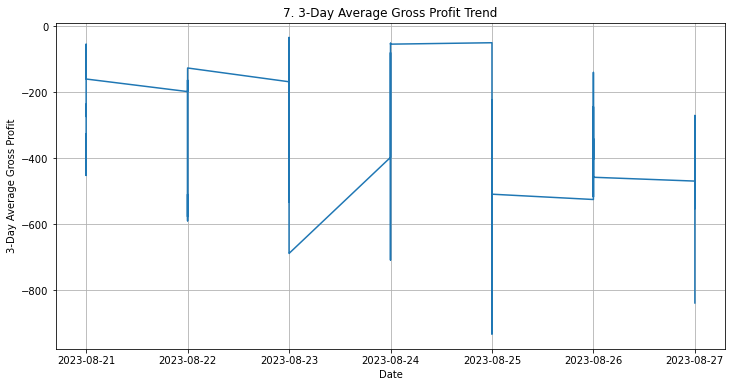

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(sales_data_2['Date'], sales_data_2['3-Day Average Gross Profit'])
plt.title('7. 3-Day Average Gross Profit Trend')
plt.xlabel('Date')
plt.ylabel('3-Day Average Gross Profit')
plt.grid(True)
plt.show()

In [11]:
vendor_profit = sales_data_2.groupby('Firm bought from')['Gross Profit'].sum()
underperforming_vendors = vendor_profit[vendor_profit <= 0]
print("8.1 Underperforming Vendors:")
print(underperforming_vendors)

8.1 Underperforming Vendors:
Firm bought from
Vendor1    -2588.65
Vendor10   -2272.27
Vendor2    -2689.74
Vendor3    -2285.98
Vendor4    -2812.50
Vendor5    -3383.36
Vendor6     -502.61
Vendor7    -7000.95
Vendor8     -946.55
Vendor9    -2665.63
Name: Gross Profit, dtype: float64


In [12]:
customer_profit = sales_data_2.groupby('Customer')['Gross Profit'].sum()
underperforming_customers = customer_profit[customer_profit <= 0]
print("8.2 Underperforming Customers:")
print(underperforming_customers)

8.2 Underperforming Customers:
Customer
Customer1    -2947.65
Customer10   -1495.82
Customer2    -4399.35
Customer3    -2084.66
Customer4    -1839.79
Customer5    -2354.35
Customer6    -2651.37
Customer7    -4853.18
Customer8    -3536.51
Customer9     -985.56
Name: Gross Profit, dtype: float64


In [13]:
buying_price_percentiles = sales_data_2['Buying price'].quantile([0.25, 0.5, 0.75])
selling_price_percentiles = sales_data_2['Selling price'].quantile([0.25, 0.5, 0.75])
print("9. Percentiles for Buying Price:")
print(buying_price_percentiles)
print("Percentiles for Selling Price:")
print(selling_price_percentiles)

9. Percentiles for Buying Price:
0.25    29.90
0.50    60.76
0.75    78.32
Name: Buying price, dtype: float64
Percentiles for Selling Price:
0.25     38.9750
0.50     78.9900
0.75    103.3975
Name: Selling price, dtype: float64


In [14]:
below_25th_percentile_buying = (sales_data_2['Buying price'] < buying_price_percentiles[0.25])
above_75th_percentile_buying = (sales_data_2['Buying price'] > buying_price_percentiles[0.75])
below_25th_percentile_selling = (sales_data_2['Selling price'] < selling_price_percentiles[0.25])
above_75th_percentile_selling = (sales_data_2['Selling price'] > selling_price_percentiles[0.75])

print("10. Prices Below 25th Percentile (Buying Price):")
print(below_25th_percentile_buying.value_counts())
print("Prices Above 75th Percentile (Buying Price):")
print(above_75th_percentile_buying.value_counts())
print("Prices Below 25th Percentile (Selling Price):")
print(below_25th_percentile_selling.value_counts())
print("Prices Above 75th Percentile (Selling Price):")
print(above_75th_percentile_selling.value_counts())

10. Prices Below 25th Percentile (Buying Price):
False    52
True     18
Name: Buying price, dtype: int64
Prices Above 75th Percentile (Buying Price):
False    52
True     18
Name: Buying price, dtype: int64
Prices Below 25th Percentile (Selling Price):
False    52
True     18
Name: Selling price, dtype: int64
Prices Above 75th Percentile (Selling Price):
False    52
True     18
Name: Selling price, dtype: int64


In [15]:
vendor_4_data = sales_data[sales_data['Firm bought from'] == 'Vendor4']

# Extract the buying prices for Vendor 4
vendor_4_buying_prices = vendor_4_data['Buying price']
vendor_4_selling_prices = vendor_4_data['Selling price']
vendor_4_quantity_sold = vendor_4_data['Quantity sold']
vendor_4_gross_margin = (vendor_4_selling_prices - vendor_4_buying_prices) * vendor_4_quantity_sold

In [16]:
current_gross_margin = (sales_data['Selling price'] - sales_data['Buying price']) * sales_data['Quantity sold']
current_total_gross_margin = current_gross_margin.sum()
new_total_gross_margin = current_total_gross_margin + vendor_4_gross_margin
impact_on_gross_margin = new_total_gross_margin - current_total_gross_margin

print("11. Impact on Gross Margin with Vendor 4: ", impact_on_gross_margin)

11. Impact on Gross Margin with Vendor 4:  1      146.71
29     389.50
34    3013.00
49      52.40
54    2688.40
59      87.23
62      32.35
63      86.38
65     407.34
dtype: float64


In [17]:
vendor_avg_profit_margin = (sales_data['Selling price'] - sales_data['Buying price']) * sales_data['Quantity sold']
vendor_avg_profit_margin = vendor_avg_profit_margin.groupby(sales_data['Firm bought from']).mean()

# Find the vendor with the highest average profit margin
highest_margin_vendor = vendor_avg_profit_margin.idxmax()

# Calculate the theoretical max margin if the firm sources only from the highest-margin vendor
theoretical_max_margin = vendor_avg_profit_margin.max()

print(" 12. Vendor with Highest Average Margin: ", highest_margin_vendor)
print("Theoretical Max Margin: ", theoretical_max_margin)

 12. Vendor with Highest Average Margin:  Vendor3
Theoretical Max Margin:  1061.7783333333334


In [18]:
import statsmodels.api as sm

# Perform a regression analysis to estimate price elasticity
X = sales_data['Selling price']
Y = sales_data['Quantity sold']

# Add a constant term to the model
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(Y, X).fit()

# Get the coefficient for price (sensitivity to price changes)
price_elasticity = model.params['Selling price']

print("13. Price Elasticity: ", price_elasticity)

13. Price Elasticity:  0.023832881149938978
